In [6]:
# Importing Libraries

import pandas as pd

import numpy as np
import os
import posixpath
import glob
import random

from PIL import Image
from PIL.Image import Resampling
from tensorflow.keras.utils import Sequence

import matplotlib.pyplot as plt

from tensorflow.keras import layers

from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.initializers import Zeros, GlorotNormal

In [2]:
# Initializing and declaring path of images

test_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
train_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
val_dir = "Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"

In [8]:
# Setting Variables

img_height, img_width = 250, 250
classifiers = ['fractured', 'not fractured']

In [4]:
def import_data(dataset, data):
    X = []
    y = []
    for i in range(2):
        path = os.path.normpath(os.path.join(data, classifiers[i]))
        path = path.replace("\\", "/")

        for img in os.listdir(path):
            try:
                loaded_img = load_img(os.path.join(path, img), color_mode="grayscale")
                loaded_img = loaded_img.resize((img_width, img_height), resample = Resampling.BICUBIC)
                img_arr = img_to_array(loaded_img)
                img_arr = img_arr.reshape(img_width, img_height, 1).astype("float32")
                X.append(img_arr)
                y.append(i)
                dataset.append([loaded_img, classifiers[i]])
            except:
                pass
    
    random.shuffle(dataset)

    return np.array(X), np.array(y)

In [5]:
train_df = []
X_train, y_train = import_data(train_df, train_dir)

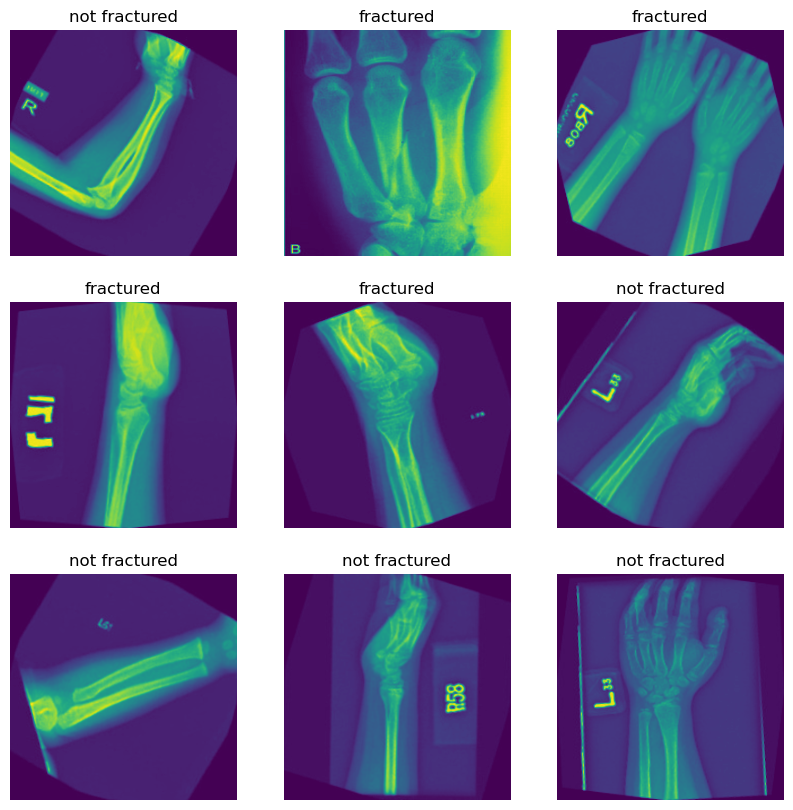

In [6]:
train_df = pd.DataFrame(train_df,columns=['image','label'])

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_df.image[i])
    plt.title(train_df.label[i])
    plt.axis("off")

# plt.tight_layout()
# plt.show()

In [16]:
model = Sequential([
    #Normalize the value
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  # First Convolutional Layer
  layers.Conv2D(32, kernel_size=(3, 3), strides=(3, 3), activation='relu', input_shape=(250, 250, 1),
                 kernel_initializer=GlorotNormal(), bias_initializer=Zeros()),
  layers.BatchNormalization(),
  layers.Dropout(0.15),
  # Second Convolutional Layer
  layers.Conv2D(16, kernel_size=(3, 3), strides=(3, 3), activation='relu', 
                 kernel_initializer=GlorotNormal(), bias_initializer=Zeros()),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.15),

  # 
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(1, activation='sigmoid')
])